 # <center>NY-AirBnB</center>

This project was born out of boredom, so do not expect any intelectual insight from this notebook nevertheless this notebook may or maynot contain the answer of NP vs P.
We use , or i should I use in this great notebook ,this magnificient notebook , this amazing notebook very simple stuff mainly
The data used in this notebook is from https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data thanks for the effort 

# Frist things first

Malipulating Data and visulazing it will be the main task in this notebook , we will focues on using the data rather then having meaningful intrepretation of it.

We start by importing the relevant and appropriate packages of python to work with this kind of tasks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
data = pd.read_csv('AB_NYC_2019.csv')
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


The first phase of work is already done, the file open without a perceived problems.
In the next phase we will get familliar with the data bien exploring it more closely. 

In [2]:
print('the shape of the data is :{}'.format(data.shape),'\n')
print('Columns names of the data are :\n{}'.format(list(data.columns)),'\n')
print('Type of the data columns:\n{}'.format(list(data.dtypes)))

the shape of the data is :(48895, 16) 

Columns names of the data are :
['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'] 

Type of the data columns:
[dtype('int64'), dtype('O'), dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'), dtype('float64'), dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'), dtype('O'), dtype('float64'), dtype('int64'), dtype('int64')]


We observe that the column ``` last_review``` is not the appropriate type for date and time, we should fix that later.

Next we shall see wich columns have non valid entery 

In [3]:
data.isna().sum()[data.isna().sum()>0]

name                    16
host_name               21
last_review          10052
reviews_per_month    10052
dtype: int64

We observe here that 4 columns have missing values but only two columns ,namely ```Last_review```wich contain the date of the last review , and the column ```review_per_month```with contain the rate of reviews are missing about 20% of the data , because this note book is to kill time , the best option for us is to drop the columns with a lot of missing values.


In [4]:
data = data.drop(['last_review','reviews_per_month'],axis = 1)
data.shape

(48895, 14)

After we droped the irrelevant columns , we will continue working on the data , we will find about how many unique values in each column

In [5]:
[(var,data[var].nunique()) for var in data.columns]

[('id', 48895),
 ('name', 47905),
 ('host_id', 37457),
 ('host_name', 11452),
 ('neighbourhood_group', 5),
 ('neighbourhood', 221),
 ('latitude', 19048),
 ('longitude', 14718),
 ('room_type', 3),
 ('price', 674),
 ('minimum_nights', 109),
 ('number_of_reviews', 394),
 ('calculated_host_listings_count', 47),
 ('availability_365', 366)]

We see that the colum ```neighbourhood_group```have only 5 uniques values , and the column ```room_type```have only 3 uniques values , let's plot them to see further.

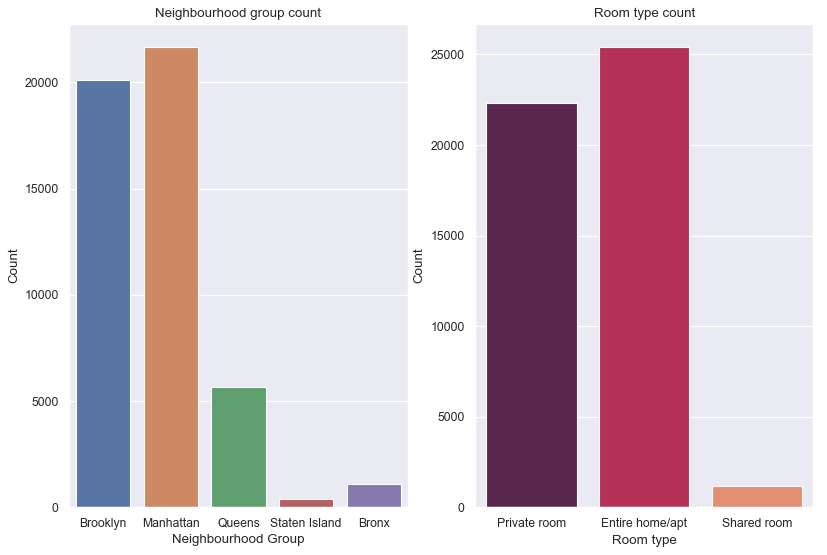

In [6]:
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
ax = sns.countplot(x='neighbourhood_group', data= data )
plt.subplot(1, 2, 2)
ax2 = sns.countplot(x='room_type', data= data ,palette="rocket")
ax.set(xlabel='Neighbourhood Group', ylabel='Count', title ='Neighbourhood group count')
ax2.set(xlabel='Room type', ylabel='Count', title ='Room type count')
plt.show()

We see from the plots that the most commun neighbourhood groups in our data set are 'Brooklyn' and 'Manhattan' followed by 'Queens'. And the most commun room type are Private rooms and entire home, we shall investigate more in a moment

Let's look into the prices neighbourhood by neighbourhood , plot them in the same graph, we limit our selfs to 700 dollar maximum mainly for esthetics

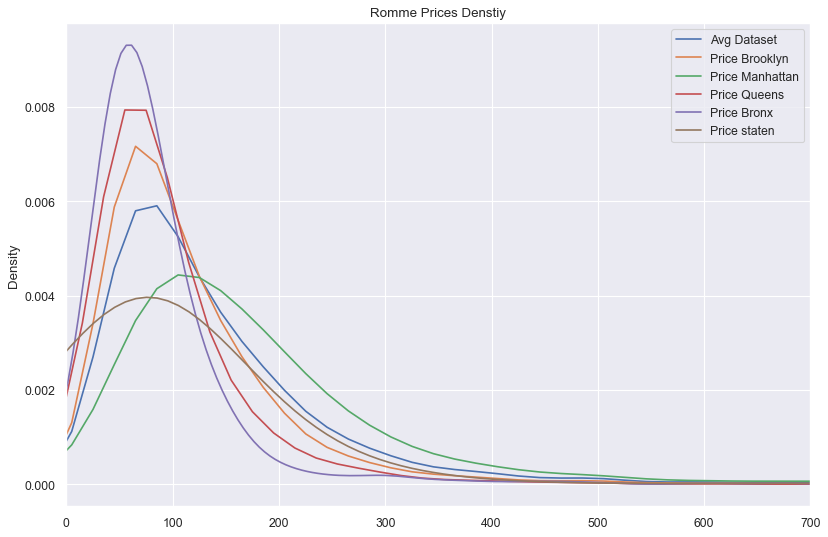

In [7]:
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
data.price.plot(kind='kde',xlim = (0,700),title='Romme Prices Denstiy',legend = True,label ='Avg Dataset')
data[data['neighbourhood_group']=='Brooklyn']['price'].plot(kind = 'kde',xlim =(0,700), legend=True,label = 'Price Brooklyn')
data[data['neighbourhood_group']=='Manhattan']['price'].plot(kind = 'kde',xlim =(0,700), legend=True,label = 'Price Manhattan')
data[data['neighbourhood_group']=='Queens']['price'].plot(kind = 'kde',xlim =(0,700), legend=True,label = 'Price Queens')
data[data['neighbourhood_group']=='Bronx']['price'].plot(kind = 'kde',xlim =(0,700), legend=True,label = 'Price Bronx')
data[data['neighbourhood_group']=='Staten Island']['price'].plot(kind = 'kde',xlim =(0,700), legend=True,label = 'Price staten')
plt.show()


what jump in our eyes is that 'Manhattan' does'nt look attractive for a poor guy like me! the 'Bronx' neighbourhood look the cheap

Just for fun let's plot all the denstiy graph of prices for each of 'Brooklyn' neighbourhood on one graph ,with a little trick

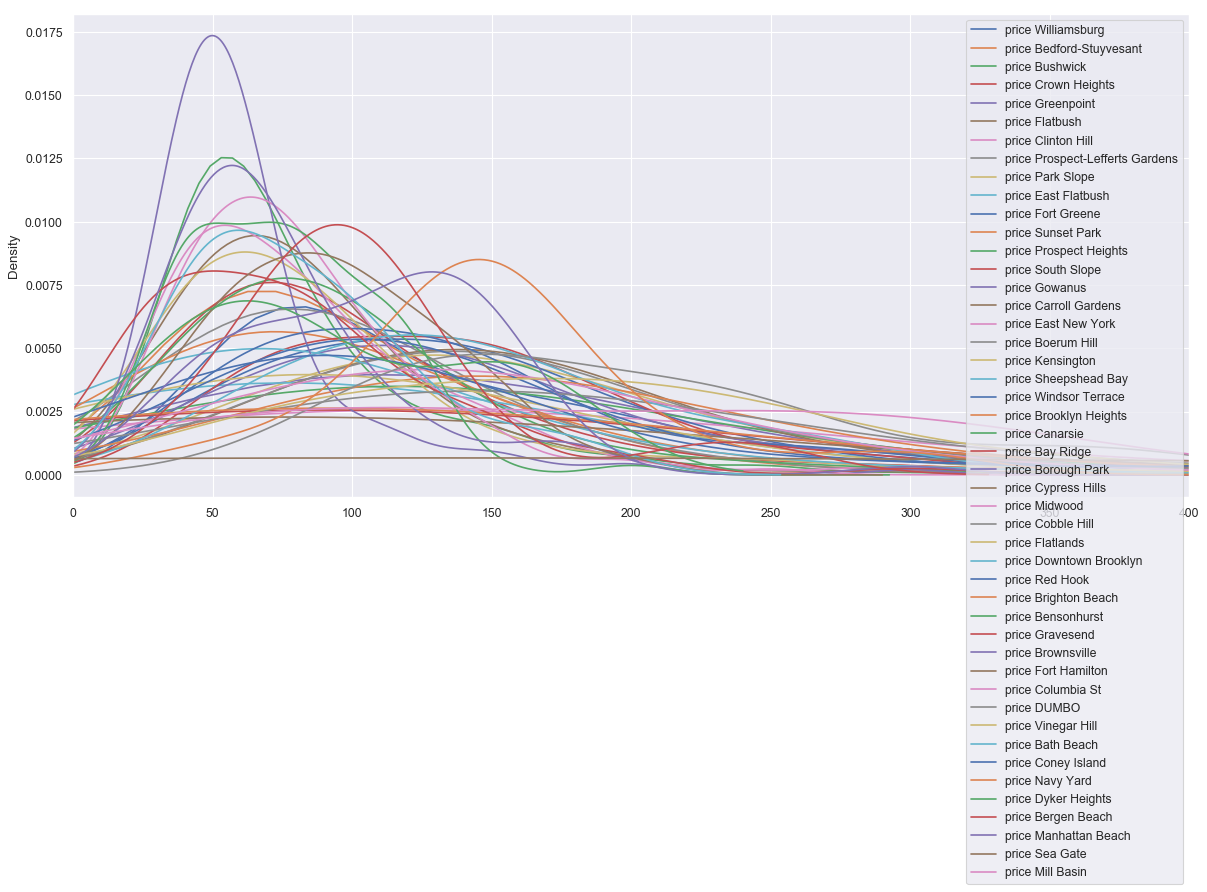

In [28]:
s = list(data[data['neighbourhood_group']=='Brooklyn']['neighbourhood'].value_counts().index)
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
for i in s:
    data[data['neighbourhood']==i]['price'].plot(kind='kde',xlim =(0,400), legend =True, label = 'price '+ i)
    

It is completly unintelligible but still fun to produce 

Let's plot a scatter plot of the prices against minimim nights

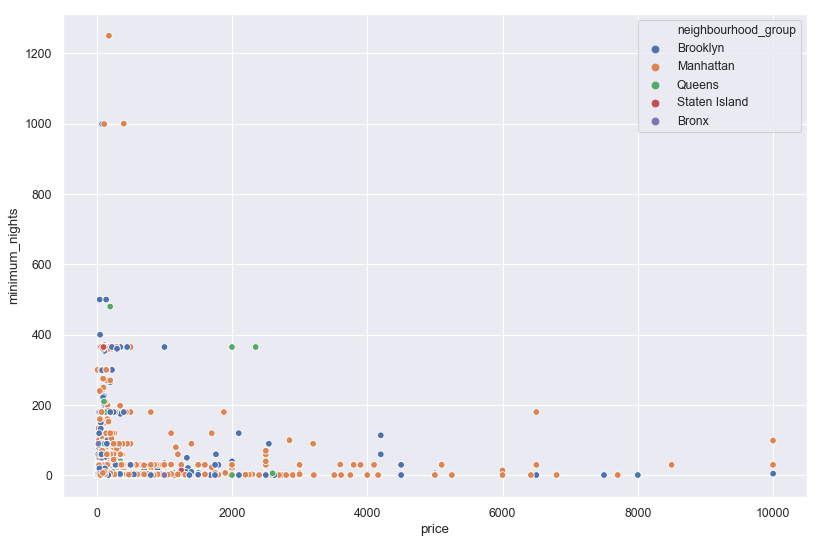

In [32]:
fig=plt.figure(figsize=(12, 8), dpi= 80, facecolor='w', edgecolor='k')
x = sns.scatterplot(x="price", y="minimum_nights",hue = 'neighbourhood_group' ,data=data)